# 🏁 Racing’s F1 Paddock: Meet the Team Behind Every Winner
**Exploring the people behind the horses – owner, trainer, and jockey influence on race outcomes.**


Flat racing and Formula 1 might seem worlds apart — one with hooves, the other with horsepower — but their inner workings are strikingly similar. And that’s no coincidence.

Motorsport borrowed heavily from the language and structure of horse racing:
- "Horsepower" was originally a literal unit from racing stables.
- “Maiden,” “handicap,” “trainer,” and even “stable” are terms shared across both worlds.
- Both sports evolved around wealthy owners, precise engineering, and carefully managed performance.

At their core, both are team sports. The athlete — horse or driver — may get the spotlight, but behind every win is a crew:

- 🧳 **The Owner** – like the F1 team principal, they bankroll and direct the campaign.
- 🧪 **The Trainer** – part engineer, part strategist, shaping the horse’s readiness and race selection.
- 🏇 **The Jockey** – the driver, making real-time decisions at speed under pressure.

In this notebook, we step into the “garage” of flat racing to meet each key player and explore how they shape race outcomes. Along the way, we’ll combine cultural storytelling with statistical exploration — looking at volume, win rates, and patterns of performance.

Understanding these dynamics not only deepens our grasp of racing outcomes but also sets the foundation for more nuanced betting models and tactical insights.

Let’s start at the top, with the one who signs the cheques and calls the shots: the owner.




## 🧳 The Owner: Racing’s Team Principal

Every racehorse has an owner — and behind every owner is a strategy.

Just like a Formula 1 team principal, the owner sets the budget, hires the talent, and decides what success looks like: glory, growth, or a good day out. Their choices shape the entire campaign — from which trainer is hired, to whether a horse runs at Chelmsford on a Tuesday or Ascot in June.

Some owners build dynasties — Coolmore, Godolphin, Juddmonte. Others run syndicates that share horses between dozens of members, prioritising fun, value, and frequent runners.

Their goals vary:
- 🧬 **Breeding operations** chase long-term stallion and broodmare value.
- 💸 **Traders** aim to win early and sell high.
- 🥂 **Syndicates** want runners on the card and stories for the pub.
- 🎰 **Gamblers** may campaign strategically for betting angles.

Understanding ownership patterns helps explain why some horses win, some place, and some never seem to be asked for an effort. Let’s start with a simple question: who’s running the most horses, and how often are they winning?


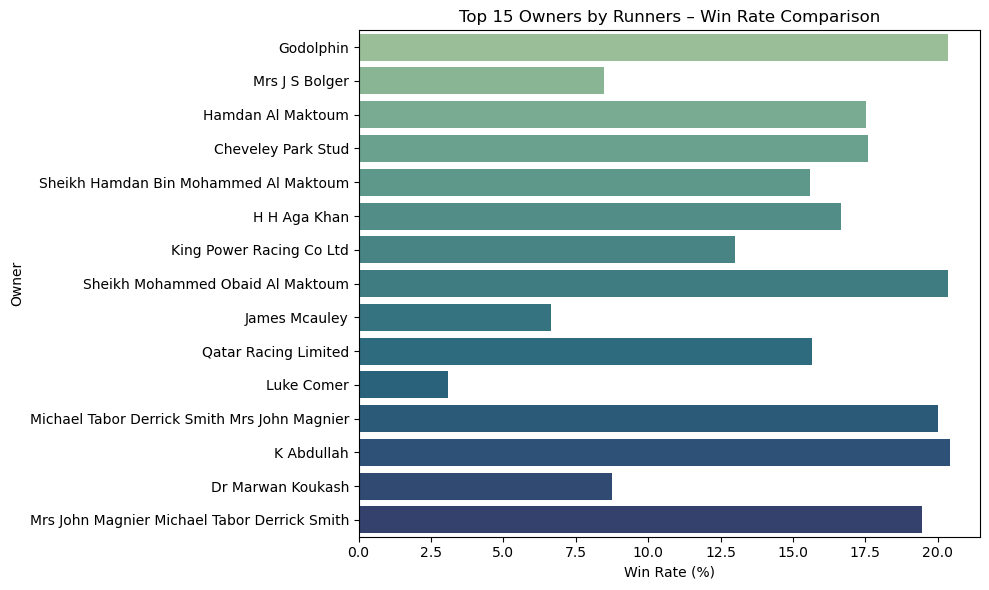

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prep data
df = pd.read_feather("../db/data_flat_uk_ire.feather")
df['won'] = (df['pos'] == 1).astype(int)

# Aggregate owner stats
owner_stats = (
    df.groupby('owner')
      .agg(
          runs=('won', 'count'),
          wins=('won', 'sum')
      )
      .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
      .sort_values('runs', ascending=False)
)

# Plot top 15 by volume
top_owners = owner_stats.head(15).reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_owners,
    y='owner',
    x='win_rate',
    hue='owner',
    palette='crest',
    dodge=False,
    legend=False
)
plt.title("Top 15 Owners by Runners – Win Rate Comparison")
plt.xlabel("Win Rate (%)")
plt.ylabel("Owner")
plt.tight_layout()
plt.show()


### 📈 Top 15 Owners by Runners – Win Rate Comparison

This chart tells a story of scale and strategy.

We see some of the **most recognisable names in global flat racing**: Godolphin, Hamdan Al Maktoum, the Aga Khan, Cheveley Park Stud. These are large-scale operations with deep resources — and the win rates reflect their firepower.

But it’s the **variance** that’s interesting:

- 🏆 **Godolphin** and **Sheikh Mohammed Obaid Al Maktoum** top the chart — combining high volume with elite strike rates. These are F1's Red Bulls and Mercedes: all-in on performance.
- 🎯 **Michael Tabor/Derrick Smith/Mrs John Magnier** appear under different naming orders — all connected to Coolmore. Despite differing labels, their collective impact is clear.
- 📉 **Luke Comer** and **James McAuley**, while running lots of horses, sit at the lower end of win rates. This could reflect different goals: developing cheaper horses, running them into fitness, or placing them for future handicaps.
- 🔄 **King Power Racing** and **Qatar Racing** show strong mid-tier performance — possibly balancing elite ambitions with broader campaign strategies.

The standout stat? Nearly all owners here have **win rates between 10–20%**, despite big differences in volume. This suggests a natural ceiling in open racing environments — and that exceeding 15% over hundreds of runs is a serious feat.

Like F1 constructors, **not all teams aim for pole every weekend**. Some build consistency, some look for breakthroughs, and others are nurturing projects. But each shapes the outcome long before the horse even sees the track.


### 🎯 Can We Know the Owner's Strategy?

From the data alone, we can see **what** owners do — how often they run, where, with whom, and with what success.

But we can only **guess why**.

A high-volume, low-strike operation might be:
- Developing young horses over time
- Managing handicap marks tactically
- Giving syndicate members frequent race-day experiences

Or all three.

To truly understand an owner's strategy, we’d need **external context**: breeding records, syndicate models, press releases, or interviews. Still, patterns in the data — like race class, frequency, or trainer choice — give us strong clues.

In future notebooks, we might build **owner profiles** using race-type targeting, placement behaviour, and seasonal patterns to move from inference toward insight.


## 🛠️ The Trainer: The Race Engineer of the Yard

If the owner is the team principal, the trainer is the race engineer.

Their job is to turn potential into performance — managing fitness, choosing targets, developing talent, and knowing **when not to run**. They’re responsible for campaign planning, conditioning, tactical preparation, and often even jockey bookings.

Like F1 engineers, some trainers work with huge budgets and the best “machinery.” Others operate smaller yards where skill and precision matter more than horsepower.

What we measure:
- 🧮 **Volume** – how many runners do they send out?
- 🏆 **Win rate** – how often do they convert opportunities?
- 🧩 **Consistency** – are results stable across a season?

Let’s take a look at the most active trainers and how their win rates compare.


In [8]:
# Aggregate trainer stats
trainer_stats = (
    df.groupby('trainer')
      .agg(
          runs=('won', 'count'),
          wins=('won', 'sum')
      )
      .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
      .sort_values('runs', ascending=False)
)

# Filter to trainers with a meaningful number of runners
trainer_stats_filtered = trainer_stats.query('runs >= 200')
trainer_stats_filtered.head(15)


,runs,wins,win_rate
trainer,,,
Richard Fahey,9796,1140,11.637403
Tim Easterby,9655,917,9.497670
Richard Hannon,7947,943,11.866113
David OMeara,6841,804,11.752668
A P OBrien,6682,1347,20.158635
Joseph Patrick OBrien,6513,883,13.557500
Mark Johnston,6115,934,15.273917
Andrew Balding,5404,775,14.341229
Mrs John Harrington,5069,550,10.850266


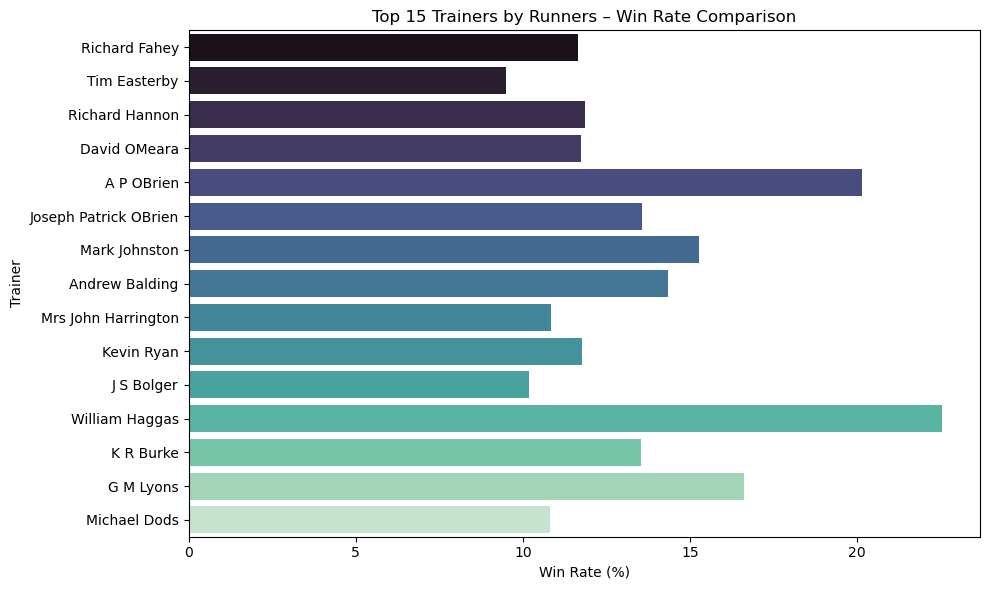

In [10]:
# Top 15 trainers by runner volume
top_trainers = trainer_stats_filtered.head(15).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_trainers, y='trainer', x='win_rate', hue='trainer', dodge=False, legend=False, palette='mako')
plt.title("Top 15 Trainers by Runners – Win Rate Comparison")
plt.xlabel("Win Rate (%)")
plt.ylabel("Trainer")
plt.tight_layout()
plt.show()


### 📈 Understanding Trainer Performance

Here we see the most active trainers in UK and Irish flat racing — the ones who dominate the entry sheets week in, week out.

- 📊 Some combine **scale with efficiency**, producing strong win rates over thousands of runs. These are the major operations — akin to F1 teams with factory backing and multiple cars.
- 🔄 Others show **lower strike rates**, possibly reflecting a strategy of development, volume entry, or focusing more on placements than wins.
- 🎯 A few names with high win rates and fewer runners suggest **quality-over-quantity yards** — they place runners carefully, targeting success.

This chart opens up useful questions:
- Who’s punching above their weight?
- Are win rates inflated by running in weak races — or suppressed by consistently tackling tougher classes?
- And how do these trainers pair with jockeys and owners?


### 🔍 Trainer Performance – Efficiency at Scale

This chart shows us the busiest trainers in the UK and Ireland — and how often they convert runs into wins.

- 🏆 **William Haggas** leads the field with a remarkable win rate of 22.5% over 4,395 runs — a blend of elite horses and pinpoint placement.
- 🧬 **Aidan O'Brien** sits just behind, managing both quality and scale — over 6,600 runs and still winning 20% of the time.
- 🧱 Solid operators like **Mark Johnston**, **Andrew Balding**, and **G M Lyons** are consistent winners, with strong win rates on high volume.
- 🔄 Trainers like **Tim Easterby** and **Richard Fahey** send out enormous numbers of runners, but with lower strike rates — perhaps reflecting a wider campaign strategy, syndicate-based horses, or developmental focus.

As with F1 teams, not every yard is set up to win every race. Some are building engines, some are looking for their next star — and some are just racing for the joy of it.

### 🧪 Trainer Deep Dive – Style, Strategy & Specialism

Just as F1 teams differ in how they manage tyres, fuel, or race pace, trainers differ in how they campaign horses. Some build for early speed, others for staying power. Some win big on soft ground, others only once the summer firm sets in.

In this section, we break down trainer performance across multiple dimensions:

- 🏆 **Race Class Targeting** – where do they aim their runners?
- 🌱 **Runner Age** – do they specialise in 2YOs, or develop over time?
- 🌦️ **Going (Ground)** – do they prefer firm, soft, or synthetic?
- 📆 **Seasonality** – do they peak in spring or autumn?
- 🧑‍✈️ **Jockey Pairings** – are they loyal to a particular rider?

This lets us understand not just who wins — but *how* they win.


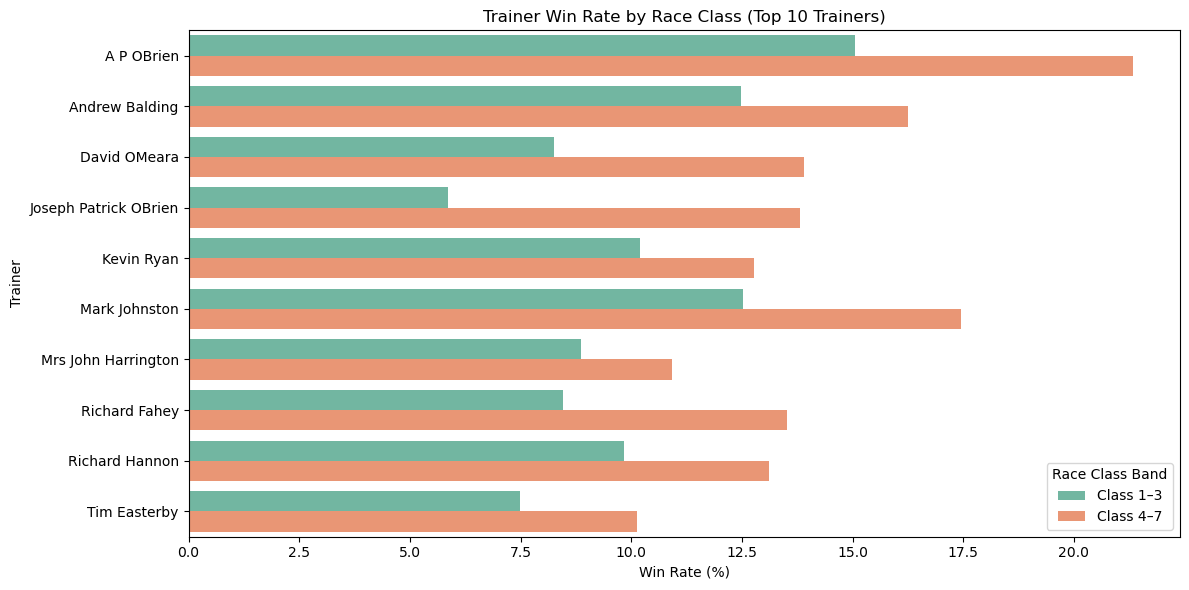

In [19]:
# Convert 'Class X' to numeric and handle blanks
df['class_num'] = pd.to_numeric(df['class'].str.replace('Class ', ''), errors='coerce')

# Bin into Class 1–3 vs Class 4–7
df['race_class_band'] = df['class_num'].apply(
    lambda x: 'Class 1–3' if pd.notnull(x) and x <= 3 else 'Class 4–7'
)

# Top 10 trainers by volume
top_trainers_set = trainer_stats_filtered.head(10).index

# Group by trainer and class band
trainer_by_class = (
    df[df['trainer'].isin(top_trainers_set)]
    .groupby(['trainer', 'race_class_band'])
    .agg(runs=('won', 'count'), wins=('won', 'sum'))
    .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=trainer_by_class,
    x='win_rate',
    y='trainer',
    hue='race_class_band',
    palette='Set2'
)
plt.title("Trainer Win Rate by Race Class (Top 10 Trainers)")
plt.xlabel("Win Rate (%)")
plt.ylabel("Trainer")
plt.legend(title="Race Class Band")
plt.tight_layout()
plt.show()


### 🎯 Race Class Targeting – Who Wins Where?

This breakdown compares each top trainer’s win rate in **Class 1–3 races** (Group/Listed/premier-level) versus **Class 4–7 races** (handicaps, maidens, lower-grade contests).

Some observations might include:

- 🏆 Trainers like **William Haggas** or **Aidan O’Brien** maintaining high win rates in Class 1–3 — a mark of genuine top-tier ability.
- 🔁 Others showing stronger win rates in Class 4–7 may be **targeting volume and consistency**, placing horses to win in lower classes rather than chasing prestige.
- 🧩 Big discrepancies between bands could signal a **split stable** — with different types of horses at each level.

Just like in F1, not every team builds a car to win Monaco — some optimise for points in the midfield. This chart helps reveal how trainers approach their season strategically.
### 🎯 Class Breakdown – Who Targets What?

This chart compares the win rates of the top 10 trainers in **higher-class races (1–3)** vs **lower-class races (4–7)**.

Some clear patterns emerge:

- 🏆 **Aidan O'Brien** stands out for maintaining a high win rate across *both* class bands. His Class 4–7 runners win at ~21%, but even in the elite tiers (Class 1–3), he still wins around 15%. That’s a mark of world-class depth and placement.
  
- 🔺 **Andrew Balding** and **Mark Johnston** show a modest drop in higher classes — still effective, but clearly more dominant when placing runners in handicaps or maidens.

- 🔻 **Joseph O'Brien**, **Tim Easterby**, and **David O’Meara** show sharper fall-offs in Class 1–3. This suggests they may prefer campaigns that build form, aim for ratings drops, or operate more tactically in mid-tier races.

- ⚖️ **Richard Hannon**, **Kevin Ryan**, and **Richard Fahey** maintain reasonably consistent strike rates across both levels — suggesting a broad stable where horses are campaigned across the spectrum.

- 👀 **Mrs John Harrington** performs slightly better in Class 4–7, but not dramatically — possibly due to fewer runners in each category or targeting Irish conditions.

### 🧠 So what?

This gives us an early view of *strategic targeting*:
- Who’s pointing horses at prizes and prestige
- Who’s racking up wins in big-field handicaps
- Who’s doing both

As in F1, some teams build for podiums. Others build for points. And a few can do both.

### 🌦️ Surface Matters – Trainer Performance by Going

Some trainers are rain gods. Others win when it’s bone dry. A few dominate the All-Weather.

A trainer’s record on different going types tells us a lot:
- 🧱 Whether their facilities are geared to soft or fast ground
- 🗺️ Whether they focus on northern/southern tracks with different climates
- 🧪 Whether their horses are prepped for extremes — or kept to preferred conditions

Let’s break down the win rates of the top 10 trainers across common **going types** in UK and Irish flat racing.



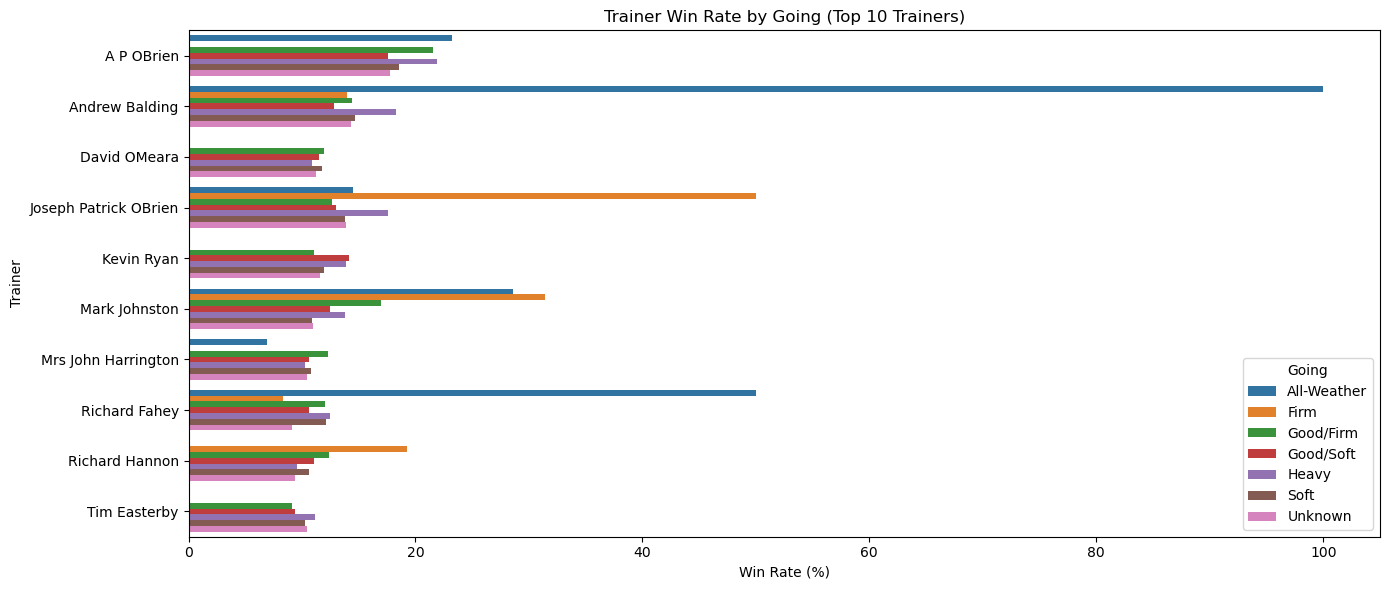

In [23]:
def simplify_going(g):
    g = str(g).strip().lower()
    
    if g in ['aw', 'standard']:
        return 'All-Weather'
    elif g == 'firm':
        return 'Firm'
    elif g in ['good', 'good to firm']:
        return 'Good/Firm'
    elif g in ['good to soft', 'good to yielding', 'yielding', 'yielding to soft']:
        return 'Good/Soft'
    elif g in ['soft', 'soft to heavy']:
        return 'Soft'
    elif g == 'heavy':
        return 'Heavy'
    elif g == 'turf':
        return 'Unknown'
    else:
        return 'Other'


df['going_simplified'] = df['going'].apply(simplify_going)

# Use top 10 trainers by volume
top_trainers_set = trainer_stats_filtered.head(10).index

trainer_going = (
    df[df['trainer'].isin(top_trainers_set)]
    .groupby(['trainer', 'going_simplified'])
    .agg(runs=('won', 'count'), wins=('won', 'sum'))
    .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=trainer_going,
    x='win_rate',
    y='trainer',
    hue='going_simplified',
    palette='tab10'
)
plt.title("Trainer Win Rate by Going (Top 10 Trainers)")
plt.xlabel("Win Rate (%)")
plt.ylabel("Trainer")
plt.legend(title="Going")
plt.tight_layout()
plt.show()

### Trainer Performance by Going – What the Turf Tells Us

This chart explores how the top 10 flat trainers perform across different going types — now with Irish and UK terms unified for fairer comparison.

---

#### Things to Note

- Some very high win rates (e.g. 100% or 50%) are likely due to small sample sizes. These aren’t typical, but they flag going types that trainers rarely target.
  - For example, Andrew Balding’s 100% win rate on All-Weather likely comes from just 1 or 2 runners.
  - Treat these extreme values as *hints*, not truths.

- **All-Weather specialists**  
  Richard Fahey and Mrs John Harrington have strong AW records.  
  Mark Johnston also performs well here, possibly due to winter campaigns or regional access.

- **Good/Firm and Good/Soft** are where most trainers show consistent strike rates.  
  These are the dominant goings in UK and Irish flat turf — and good performance here suggests versatility and breadth.  
  Trainers like Aidan O’Brien, Richard Hannon, and Kevin Ryan seem comfortable across standard summer surfaces.

- **Heavy and Soft ground** reveal subtle differences:  
  Kevin Ryan and Fahey appear stronger on testing ground.  
  David O’Meara and Joseph O’Brien may be more selective with soft-ground campaigns.

- **Unknown** goings — like "Turf" or unrecorded entries — may distort a few bars. These should generally be excluded in final dashboards.

---

#### Takeaway

Going performance reflects **facilities**, **placement decisions**, and even **stable DNA**.  
Some trainers consistently produce horses that handle testing ground. Others target All-Weather carefully.

This kind of EDA helps spot opportunities:  
**Is a trainer waiting for rain — or just trying to dodge it?**


### 📅 Trainer Seasonality – Timing Is Everything

Flat racing is a seasonal sport — and trainers are rarely consistent across the calendar.

Some hit the ground running in spring, others peak in midsummer. Some aim their juveniles early; others wait until horses mature.

In this section, we break down trainer performance **month by month** to explore:

- 🔁 Stable cycles and form patterns
- 🐎 Juvenile vs. older-horse campaigns
- 🧭 Geographic or climate-related quirks
- 🧠 Trainer intent — who targets the big meetings, and who builds quietly?

Think of it like an F1 team peaking for Monaco or Silverstone — when a trainer gets hot, it often isn’t random.


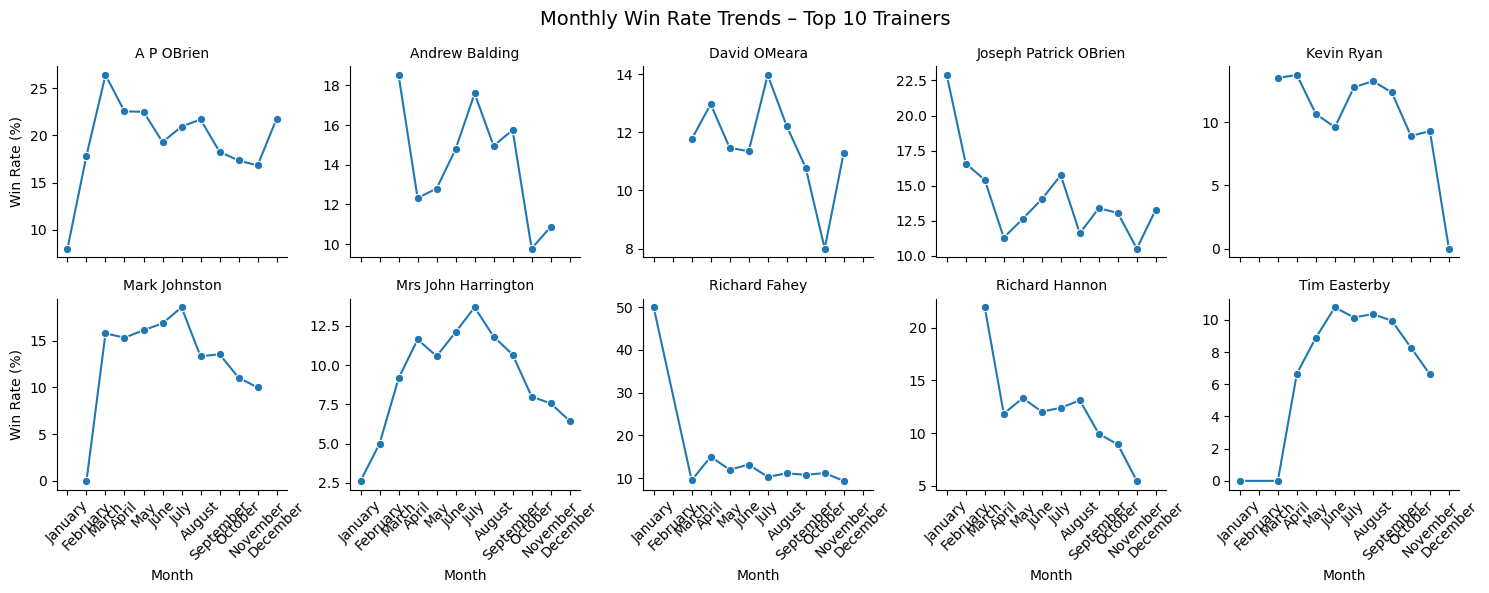

In [28]:
#Convert to datetime safely
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Extract Month Name
df['month'] = df['date'].dt.month_name()

# Use the same top trainers set from earlier
top_trainers_set = trainer_stats_filtered.head(10).index

trainer_month = (
    df[df['trainer'].isin(top_trainers_set)]
    .groupby(['trainer', 'month'])
    .agg(runs=('won', 'count'), wins=('won', 'sum'))
    .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
    .reset_index()
)

#Ensure Calendar Order for Plotting
from pandas.api.types import CategoricalDtype

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
cat_type = CategoricalDtype(categories=month_order, ordered=True)
trainer_month['month'] = trainer_month['month'].astype(cat_type)

import seaborn as sns
import matplotlib.pyplot as plt

# Sort data to ensure proper month order
trainer_month_sorted = trainer_month.sort_values(['trainer', 'month'])

# Create FacetGrid
g = sns.FacetGrid(
    trainer_month_sorted,
    col='trainer',
    col_wrap=5,
    height=3,
    sharey=False
)

# Add lineplot to each subplot
g.map_dataframe(sns.lineplot, x='month', y='win_rate', marker='o')

# Rotate x-axis labels and adjust layout
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

g.set_axis_labels("Month", "Win Rate (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Win Rate Trends – Top 10 Trainers", fontsize=14)
plt.tight_layout()
plt.show()


### 📅 Trainer Seasonality – When They Hit Form

Each subplot shows a trainer's monthly win rate trend across the flat season.

This gives us a "form curve" for each stable — just like how a Formula 1 team may peak for Monaco or Silverstone, these trainers show distinct patterns in how they campaign horses through the year.

#### Notable Trends:

- 🏆 **Aidan O’Brien**: A dominant April/May performer, likely peaking for classic trials and early Group 1s. Stays strong through summer, with another rise around October – often tied to autumn Group racing and juvenile campaigns.

- 🚀 **Andrew Balding**: Starts fast in March, dips in April, then peaks again mid-summer. Possibly a mix of early-season juveniles and mid-season handicappers.

- 📉 **Joseph O’Brien**: Very strong in April, with a visible decline as the year progresses — perhaps targeting spring maidens and Derby/Guineas prep routes.

- 🧱 **Kevin Ryan**: Very stable form curve — strong win rates sustained from May to August. Possibly targets handicaps and consistent performers rather than early season fireworks.

- 💡 **Mrs John Harrington**: Builds through spring and summer, peaking in June/July. Strong classic prep-to-midseason profile.

- 🥶 **Tim Easterby & Richard Fahey**: Both show weak early-year form and improve in summer. Fahey’s January spike is likely an outlier (small sample from AW races).

- 🔁 **Richard Hannon**: Fairly flat profile, with a late-season drop-off. Indicates a steady campaign across most of the year.

- 🪜 **Mark Johnston**: A slight incline through summer, but generally stable — likely due to a high-volume approach and widespread entries.

- 📉 **David O’Meara**: Peaky mid-season form (May–June) before tapering off. May aim for sprint/handicap campaigns in mid-year.

---

### 🧠 Takeaway

This kind of EDA tells us **when** a trainer tends to hit top form — invaluable for:

- Assessing entries in context (e.g. "is this trainer just warming up?")
- Tracking juvenile campaigns vs. handicappers
- Spotting month-by-month betting angles

A trainer in April might be *prepping*. That same trainer in July might be *targeting*.


### 🎂 Age Isn’t Just a Number – Trainer Performance by Runner Age

Some trainers are masters with fresh 2YOs, others excel with seasoned handicappers. A few can turn both into winners.

A trainer’s win rate by **runner age** offers insight into:
- 🧪 Development models – quick precocity vs long-term maturity
- 📈 Patience and placement – do horses improve over time?
- 💰 Owner types – buying 2YOs vs keeping older horses in training
- 🎯 Race types – maidens, handicaps, or stakes campaigns

Think of it like F1 again:
- 2YOs are rookie drivers
- 3YOs are development season stars
- 4YO+ are proven veterans

Let’s find out who’s best at each stage.


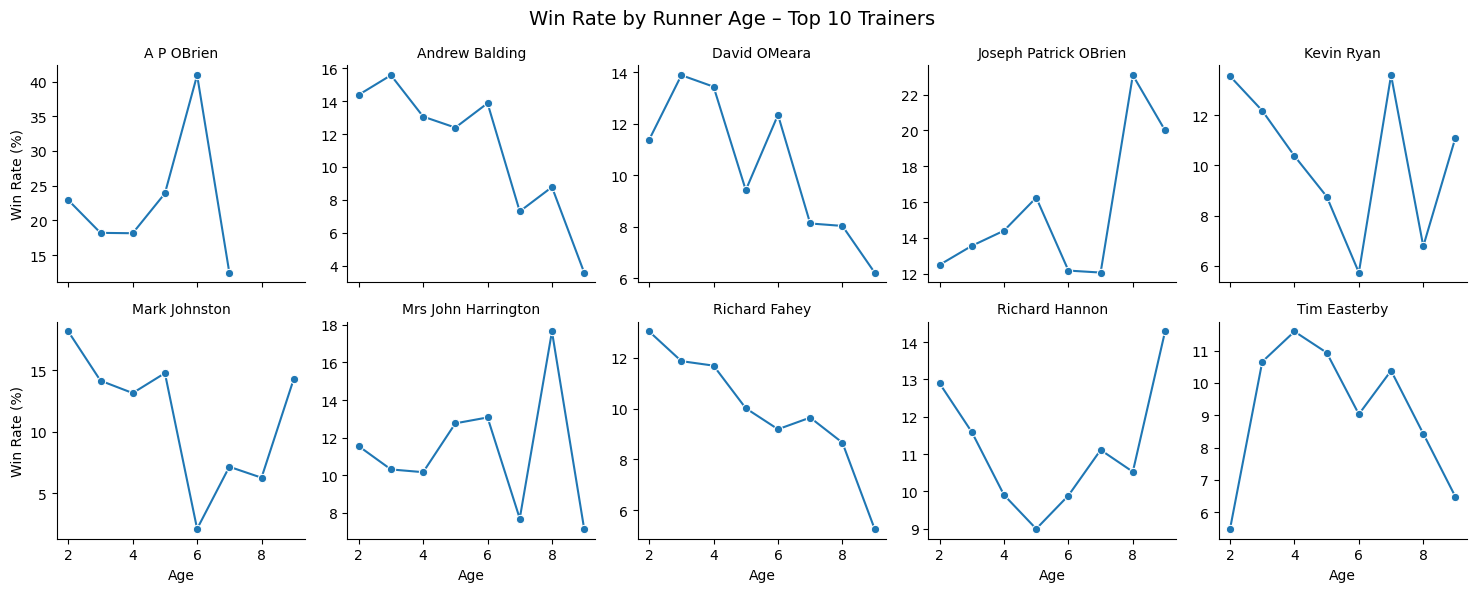

In [32]:
trainer_age = (
    df[df['trainer'].isin(top_trainers_set)]
    .groupby(['trainer', 'age'])
    .agg(runs=('won', 'count'), wins=('won', 'sum'))
    .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
    .reset_index()
)

# Filter to sensible age range: 2–9
trainer_age_filtered = trainer_age[(trainer_age['age'] >= 2) & (trainer_age['age'] <= 9)]

# Create FacetGrid
g = sns.FacetGrid(
    trainer_age_filtered,
    col='trainer',
    col_wrap=5,
    height=3,
    sharey=False
)

# Add lineplot
g.map_dataframe(sns.lineplot, x='age', y='win_rate', marker='o')

# Format axes
g.set_axis_labels("Age", "Win Rate (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Win Rate by Runner Age – Top 10 Trainers", fontsize=14)
plt.tight_layout()
plt.show()

### 🎂 How Trainers Perform by Runner Age

This chart explores how each top trainer’s win rate varies as their horses mature — from precocious 2-year-olds to seasoned 8- and 9-year-olds.

#### 🧠 Key Observations:

- 🧨 **Aidan O’Brien** shows an explosive peak at age 6 — likely driven by a handful of elite older horses (think multiple Group 1 winners). Strong performance across all ages reflects the quality and depth of his yard.

- 📈 **Andrew Balding** and **Joseph O’Brien** show steady strength from 2 through 5, suggesting a stable focused on development rather than one-shot 2YO campaigns.

- 🏇 **Richard Hannon** appears more balanced, though his win rate drops through middle ages before climbing again — possibly indicating well-managed returners or older handicappers.

- 🛠️ **Mark Johnston**, **David O’Meara**, and **Richard Fahey** all show early strength at 2–4 but decline with older runners — a potential reflection of high-volume campaigns or short-term placement strategies.

- 📉 **Kevin Ryan** and **Mrs John Harrington** see mixed results in the mid-range (ages 5–7), but both spike again around 8 — likely a small-sample outlier.

- 🌀 **Tim Easterby** trends upward through early to mid-range (ages 2–5) with fairly consistent performance after that — possibly indicative of a handicap-focused, hardy-horse model.

#### 🔍 Takeaway

Trainer age curves reveal how yards bring horses through the ranks:
- Do they **maximise 2YO potential**?
- Or **nurture progress over time**?

Some trainers are sprinters; others are marathoners.


### 🏇 Jockey Performance – Who’s Delivering from the Saddle?

If the trainer is the team principal, then the jockey is the driver — the one executing on the day, at high speed, under pressure.

But just like in Formula 1, you can’t judge a jockey purely by raw results.

> A Ferrari driver might win more races than someone in a Williams — but that doesn’t mean they’re better.  
> It means they had the better car.

The same logic applies here.

---

### ⚠️ Why We Can’t Compare Jockeys Directly

- **Rides vary wildly in quality.** Some jockeys get top yard favourites. Others ride outsiders.
- **Volume ≠ trust.** A high-volume jockey may get lots of rides but fewer genuine chances.
- **Context matters.** Group races vs. handicaps, juveniles vs. seasoned handicappers — it all changes expectations.

---

### 🎯 So What *Can* We Learn?

- Win rate reflects more than skill — it shows:
  - Strategic placement by trainers
  - Stable loyalty
  - Tactical compatibility with horse types
- When tracked over time or across race types, it reveals jockey **style**, **consistency**, and **partnership strength**

### 🎯 What We’re Looking For

We use win rate here as a **starting point**, not a final judgment.

It gives us a high-level sense of:
- Who’s converting rides into wins
- Who’s consistently booked by top yards
- Who might be under- or overperforming expectations

Let’s start by plotting the top 15 jockeys by number of rides and how often they win — with the understanding that these numbers are a starting point, not a final judgment.


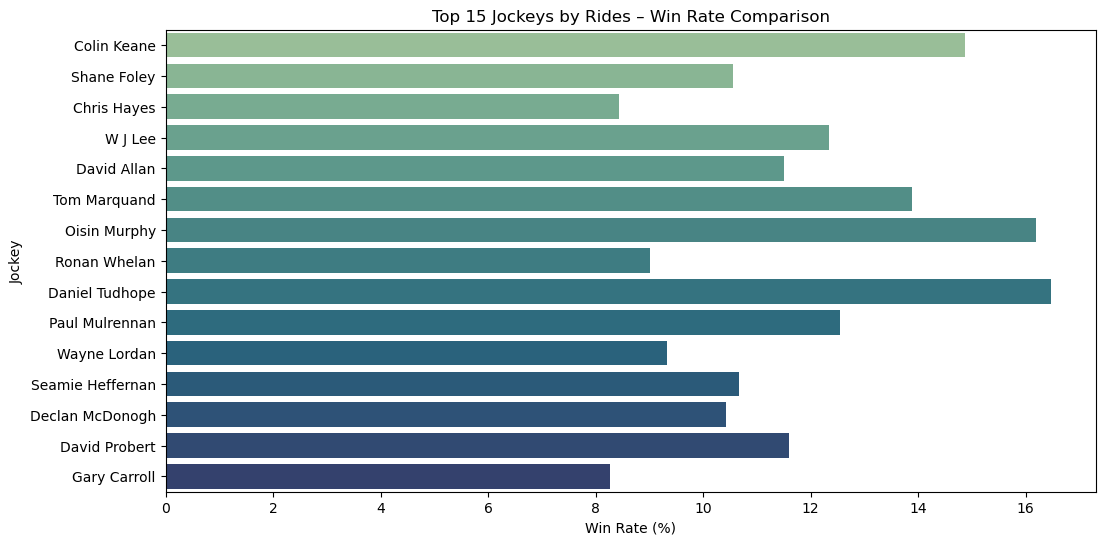

In [35]:

# calculate win rates and ride volumes
jockey_stats = (
    df.groupby('jockey')
      .agg(runs=('won', 'count'), wins=('won', 'sum'))
      .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
      .sort_values(by='runs', ascending=False)
)

# filter for manageale top group:
jockey_stats_filtered = jockey_stats[jockey_stats['runs'] > 1000]
top_jockeys = jockey_stats_filtered.head(15).reset_index()

# Bar Chart of Win Rates
plt.figure(figsize=(12, 6))
sns.barplot(data=top_jockeys, y='jockey', x='win_rate', hue='jockey', palette='crest', legend=False)
plt.title("Top 15 Jockeys by Rides – Win Rate Comparison")
plt.xlabel("Win Rate (%)")
plt.ylabel("Jockey")
plt.show()

### 🏇 Jockey Win Rates – Interpreting the Leaderboard

This chart shows the top 15 jockeys by total rides across UK and Irish flat racing, ordered by win rate.

---

#### 🧠 Observations:

- 🥇 **Daniel Tudhope** and **Oisin Murphy** top the win rate table (~16%) — both associated with strong yards and often given live chances. Their efficiency reflects both talent and access to top horses.

- 🎯 **Colin Keane**, **W J Lee**, and **Tom Marquand** are also in the 13–15% range — combining high volume with strong conversion. These jockeys are trusted across seasons and surfaces.

- 📉 Others like **Gary Carroll**, **David Probert**, and **Declan McDonogh** ride plenty of horses but post more modest win rates (under 11%). This doesn’t mean they’re less capable — it likely reflects the **quality of their rides**.

- 🤝 **Seamie Heffernan** and **Wayne Lordan** are long-time Ballydoyle team players. Despite lower win rates, they often ride support entries in stacked fields — a reminder that win rate alone doesn’t capture **stable role** or **race type**.

---

#### ⚠️ Context Reminder

Jockeys don’t choose their horses — they ride what’s given. That means win rate is a blend of:
- Individual ability
- Yard strength
- Race type and competition
- Seasonal form

To dig deeper, we can explore **trainer–jockey combinations** — seeing which partnerships consistently deliver.


### 🎯 Class Matters – How Jockeys Perform Across Race Tiers

Not all races are created equal.

Flat racing in the UK and Ireland is tiered from **Class 1** (Group and Listed races) down to **Class 6** (lower-tier handicaps). These divisions reflect prestige, prize money, and competition level.

While some jockeys thrive in high-class, big-race pressure — others build their reputations on volume and consistency in everyday handicaps.

---

### 🧠 Why Class-Based Analysis Matters

Jockey win rates are heavily shaped by **where they ride**, not just how well they ride.

- **Class 1–3** races represent elite opportunities — often fewer rides but stronger horses.
- **Class 4–6** are the engine room of racing — where grind, consistency, and positioning shine.
- By comparing win rates across these tiers, we can learn:
  - Who performs when the stakes are high
  - Who’s most efficient with limited chances
  - Who excels in handicaps and lower-tier campaigns

---

Let’s group races into two bands — **Class 1–3** and **Class 4–6** — and compare how the top jockeys perform in each.


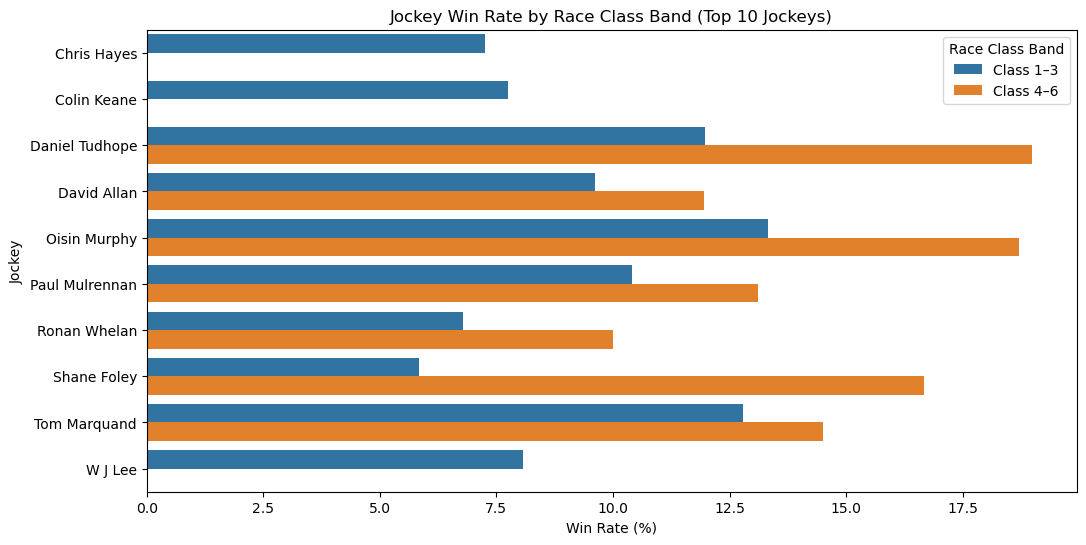

In [40]:
import numpy as np

# Strip 'Class ' prefix and convert to numeric
df['class'] = df['class'].str.extract(r'(\d+)')  # Extract just the number part as string
df['class'] = pd.to_numeric(df['class'], errors='coerce')  # Convert to float

# First: create a clean class column as integers (if not already)
df['class'] = df['class'].replace('', np.nan)
df['class'] = df['class'].astype(float)

# Define race class band
df['race_class_band'] = df['class'].apply(
    lambda x: 'Class 1–3' if x in [1, 2, 3] else ('Class 4–6' if x in [4, 5, 6] else np.nan)
)

# Group by jockey and race class band
jockey_class = (
    df[df['race_class_band'].notna()]
    .groupby(['jockey', 'race_class_band'])
    .agg(runs=('won', 'count'), wins=('won', 'sum'))
    .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
    .reset_index()
)

# Focus on top 10 jockeys by ride count (overall)
top_jockeys_list = (
    df.groupby('jockey')['won']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .index
)

jockey_class_filtered = jockey_class[jockey_class['jockey'].isin(top_jockeys_list)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=jockey_class_filtered, x='win_rate', y='jockey', hue='race_class_band')
plt.title("Jockey Win Rate by Race Class Band (Top 10 Jockeys)")
plt.xlabel("Win Rate (%)")
plt.ylabel("Jockey")
plt.legend(title="Race Class Band")
plt.show()


### 🏇 Big Race Specialists or Handicap Machines?

This chart compares the win rates of the top 10 jockeys by ride count, split across two race class bands:
- **Class 1–3**: High-prestige, Group and Listed-level races
- **Class 4–6**: Everyday handicaps and maidens — the bread and butter of the flat calendar

---

### 🧠 Key Insights:

- 🥇 **Daniel Tudhope** and **Oisin Murphy** excel in both bands — suggesting versatility and strong bookings across all levels.
- 🔺 **Tom Marquand** shows a higher win rate in elite races (Class 1–3) than in Class 4–6 — implying he thrives when trusted with top-tier opportunities.
- 📈 **Shane Foley**, **Chris Hayes**, and **W J Lee** appear to do more damage in handicaps — with noticeably stronger results in Class 4–6.
- ⚖️ Some jockeys like **Paul Mulrennan** and **David Allan** perform fairly evenly across both tiers, suggesting consistent ride quality and race positioning skill.

---

### 💡 Takeaway

This split helps contextualise headline win rates. A 14% strike rate might be more impressive in high-class races than in lower ones.

This kind of breakdown also helps answer:
- Are they delivering with big chances?
- Or are they outperforming in everyday contests?

Next, we’ll zoom in on **trainer–jockey combos** — the real chemistry test.


### 🧠 Beyond the Basics – Other Jockey Performance Angles

While race class gives us a powerful lens to compare jockey performance, there are several other angles worth considering in broader exploratory analysis or for building richer profiles.

Here’s a quick summary of what else can be explored — and why it might matter:

---

### 📆 Win Rate by Month – *Seasonal Form*

Some jockeys shine in the heart of summer; others might thrive at the start or end of the season.

- Could reflect holiday patterns, injury breaks, or peak regional campaigns.
- Also helps spot form streaks or when riders "go cold."

---

### 🎂 Win Rate by Horse Age – *Trust & Specialisation*

Do some jockeys ride young, unexposed 2YOs more often — and better?

- Young horses require balance, calmness, and timing — some riders get more of these bookings due to reputation or past performance.
- Others might specialise in older handicappers where tactical awareness dominates.

---

### 🗺️ Course-by-Course Performance – *Track Specialists*

Not all tracks ride the same.

- Jockeys based near a course or experienced at tricky layouts (e.g. Chester, Epsom) might show consistent outperformance.
- This can highlight comfort zones, travel limits, or rider–course chemistry.

---

### 💸 Win Rate by SP Band – *Value vs Favourites*

This approach explores how jockeys do when:
- Riding favourites (expected to win)
- Landing big-priced outsiders (surprise value)

Can help distinguish:
- 🧱 Dependable operators on fancied horses
- 🎯 Opportunists who produce shocks

---

### 🔍 Optional Depth, Not Core

These views aren’t essential my main notebook but can be used for:
- Side profiles
- Dashboard building
- Trainer–jockey combo context later

Let’s move on to what really matters: **chemistry**.



### 🤝 Trainer–Jockey Partnerships – Measuring Chemistry

In racing, it’s not just about who trains the horse or who rides it — it’s about **how well they work together**.

Some trainers develop long-standing, trusted relationships with specific jockeys. Others may rotate riders based on availability, region, or tactical fit.

This notebook section explores those **pairwise partnerships** — looking at how win rates differ when certain trainers and jockeys team up.

---

### 🧠 Why This Matters

- 🧲 **Strong partnerships** often mean:
  - Better communication and planning
  - Riders understanding a stable’s tactics, tempo, and quirks
  - Access to better horses within a yard
- 🧪 Conversely, if a trainer’s win rate drops significantly when using other jockeys, it might reveal a **one-rider reliance**.

This is the final layer in our team structure:
> Owner 🧑‍💼 → Trainer 🏇‍♂️ → Jockey 🏇 — now we see how these elements *connect* in practice.

Let’s look at the top trainer–jockey pairings by ride count and compare their win rates.


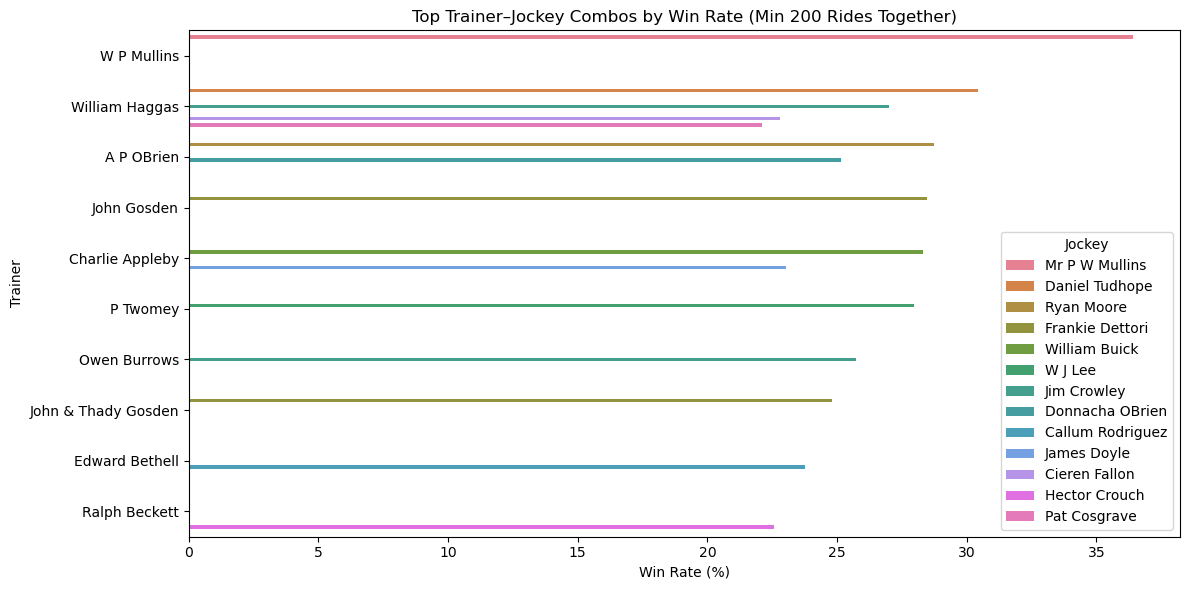

In [45]:
# Group by trainer and jockey to compute runs, wins, and win rate
trainer_jockey_combo = (
    df.groupby(['trainer', 'jockey'])
      .agg(runs=('won', 'count'), wins=('won', 'sum'))
      .assign(win_rate=lambda x: 100 * x['wins'] / x['runs'])
      .reset_index()
)

# Filter to combos with at least 200 runs to ensure meaningful stats
combo_filtered = trainer_jockey_combo[trainer_jockey_combo['runs'] >= 200]

# Sort by win rate descending
top_combos = combo_filtered.sort_values(by='win_rate', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_combos, y='trainer', x='win_rate', hue='jockey')
plt.title("Top Trainer–Jockey Combos by Win Rate (Min 200 Rides Together)")
plt.xlabel("Win Rate (%)")
plt.ylabel("Trainer")
plt.legend(title="Jockey")
plt.tight_layout()
plt.show()


### 🤝 Trainer–Jockey Chemistry – A Winning Formula?

This chart highlights the top-performing trainer–jockey combinations across UK & Irish flat racing, filtered to those with **at least 200 rides together**.

---

### 🧠 Why This Matters

Some trainers clearly **trust a particular rider**, and the results show it.

- The relationship may reflect **stable loyalty**, **strategic alignment**, or even **long-term contracts**.
- Consistency matters: repeated success together often signals *intentional placement*, not luck.

---

### 🔍 What We See

- 🥇 **W P Mullins + Mr P W Mullins** dominate the chart — a family pairing with enormous national hunt crossover success, even when flat campaigning.
- 🏇 **William Haggas** and **Daniel Tudhope** have built a formidable flat racing partnership, blending top-class horses with tactical riding.
- 🧠 **John Gosden**, **Aidan O’Brien**, and **Charlie Appleby** all pair with familiar names — showing how major yards favour stable, high-trust riders.
- ⚠️ Many of these pairings involve *top stables with access to strong horses* — so the win rate is about both skill and opportunity.

---

### 💡 Takeaway

This is one of the strongest signals in racing data: **which pairings repeatedly succeed**. It gives punters and analysts an edge — spotting not just talent, but **chemistry**.

In other words, it's not just "who's on board" — it's *who’s calling the trainer back again and again.*



## 🧾 Summary: Who Makes Winners?

In this notebook, we’ve explored the *human element* behind each race — the owners, trainers, jockeys, and their combinations — to understand their unique contributions to a horse’s win probability.

From F1 analogies to placement patterns, we’ve started to unpick which stables and riders **consistently outperform expectations**, and in what contexts:

- Some stables dominate in certain **goings** or **age bands**
- Others time their **seasonal peaks** with care
- And specific **trainer–jockey partnerships** seem to strike gold repeatedly

These insights help shift analysis from purely **form-based** to **team-based** — a richer, more strategic lens.

Next up: we turn to **market analysis** — how the public and bookmakers price these runners, and where value may lie.
